In [68]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("../data_raw/Google Mobility.csv")
google = df[df['country_region_code'] == 'US'].dropna().iloc[:, 3:]
google.head(5)

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
95147,Baldwin County,2020-02-15,17.0,12.0,55.0,8.0,6.0,-2.0
95148,Baldwin County,2020-02-16,8.0,8.0,-12.0,7.0,-3.0,2.0
95149,Baldwin County,2020-02-17,9.0,9.0,31.0,7.0,-3.0,1.0
95150,Baldwin County,2020-02-18,7.0,8.0,21.0,0.0,2.0,0.0
95151,Baldwin County,2020-02-19,12.0,9.0,41.0,8.0,3.0,-1.0


In [69]:
google.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,38779.000000,38779.000000,38779.000000,38779.000000,38779.000000,38779.000000
mean,-21.668532,-4.325898,12.326723,-20.750612,-25.906857,10.372289
std,24.646406,15.020097,42.335270,26.025742,22.767967,9.424412
min,-89.000000,-72.000000,-90.000000,-90.000000,-80.000000,-6.000000
25%,-42.000000,-15.000000,-15.000000,-40.000000,-45.000000,0.000000
50%,-28.000000,-3.000000,8.000000,-19.000000,-32.000000,11.000000
75%,4.000000,5.000000,33.000000,1.000000,0.000000,18.000000
max,119.000000,70.000000,413.000000,222.000000,27.000000,38.000000


In [79]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd
#google.set_index('date', inplace=True)
%matplotlib inline
sns.set(rc={'figure.figsize':(21, 4)})

Text(0.5, 1.0, 'Mobility Change in Cook County')

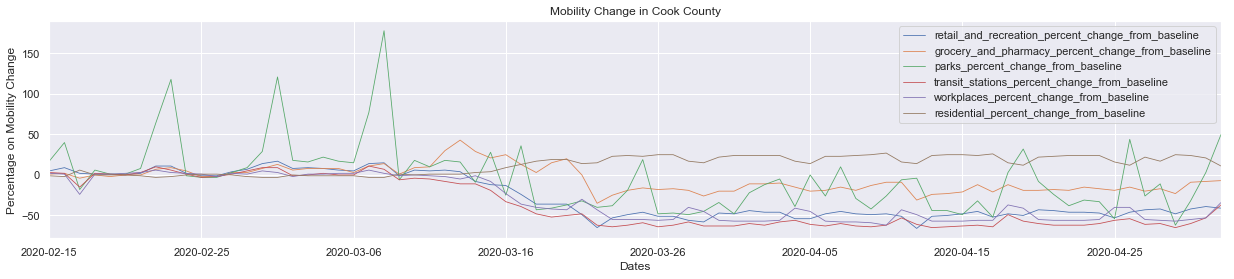

In [80]:
google_2 = google[google['sub_region_2'] == 'Cook County']
google_2.plot(linewidth=0.8)
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Mobility Change in Cook County')

Text(0.5, 1.0, 'Mobility Change in Ada County')

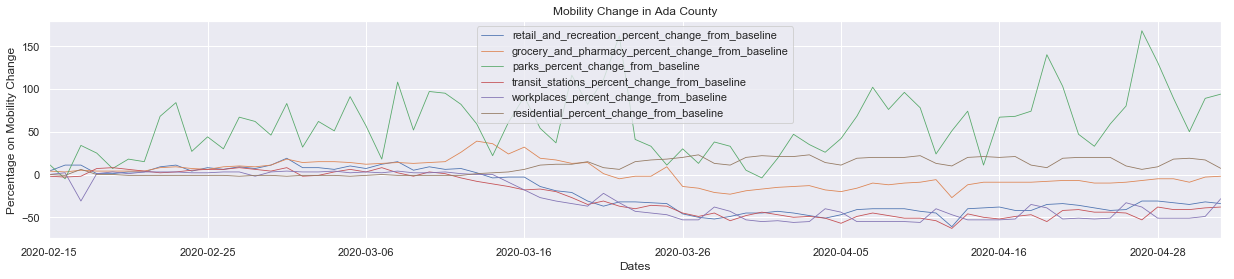

In [81]:
google_3 = google[google['sub_region_2'] == 'Ada County']
google_3.plot(linewidth=0.8)
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Mobility Change in Ada County')

In [82]:
weather_counties = pd.read_csv("../data_raw/Weather - US Counties.csv")
weather_counties = weather_counties[['date', 'county', 'state', 'lat', 'lon', 'mean_temp', 'precipitation']]
weather_counties.head(5)

,date,county,state,lat,lon,mean_temp,precipitation
0,1/21/20,Snohomish,Washington,48.047489,-121.697306,44.1,0.00
1,1/22/20,Snohomish,Washington,48.047489,-121.697306,44.8,0.29
2,1/23/20,Snohomish,Washington,48.047489,-121.697306,49.9,0.54
3,1/24/20,Cook,Illinois,41.840039,-87.816716,36.1,0.16
4,1/24/20,Snohomish,Washington,48.047489,-121.697306,51.5,0.32


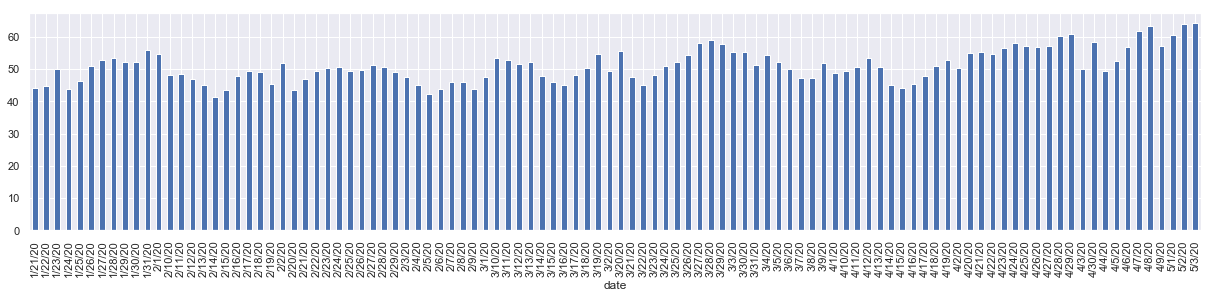

In [83]:

by_date= weather_counties.groupby('date')['mean_temp'].mean()
by_date.plot(kind='bar')

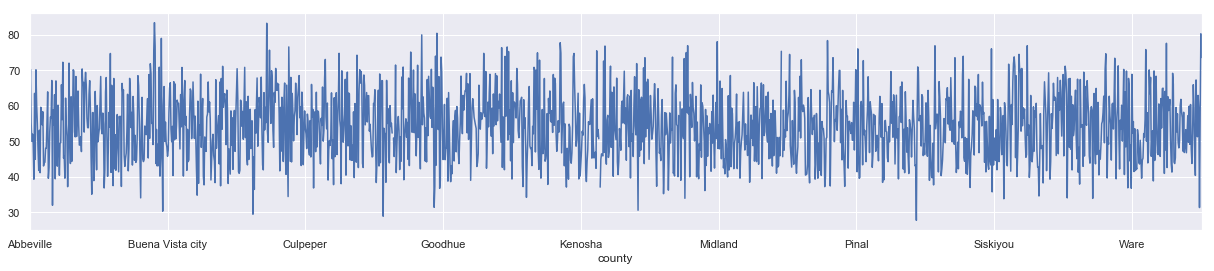

In [87]:
by_county= weather_counties.groupby('county')['mean_temp'].mean()
by_county.plot()